In [82]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [3]:
# Importing the dataset
df = pd.read_csv('/content/gdrive/My Drive/Stores.csv')

# Data Analysis

In [4]:
#Print the first 5 records
df.head()

,Store_Area,Items_Available,Daily_Customer_Count,Store_Sales
0,1659,1961,530,66490
1,1461,1752,210,39820
2,1340,1609,720,54010
3,1451,1748,620,53730
4,1770,2111,450,46620


In [5]:
# Type of dataset
type(df)

pandas.core.frame.DataFrame

In [6]:
#Info about the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 896 entries, 0 to 895
Data columns (total 4 columns):
 #   Column                Non-Null Count  Dtype
---  ------                --------------  -----
 0   Store_Area            896 non-null    int64
 1   Items_Available       896 non-null    int64
 2   Daily_Customer_Count  896 non-null    int64
 3   Store_Sales           896 non-null    int64
dtypes: int64(4)
memory usage: 28.1 KB


In [7]:
#Total rows and columns
df.shape

(896, 4)

In [8]:
# Description
df.describe()

,Store_Area,Items_Available,Daily_Customer_Count,Store_Sales
count,896.000000,896.000000,896.000000,896.000000
mean,1485.409598,1782.035714,786.350446,59351.305804
std,250.237011,299.872053,265.389281,17190.741895
min,775.000000,932.000000,10.000000,14920.000000
25%,1316.750000,1575.500000,600.000000,46530.000000
50%,1477.000000,1773.500000,780.000000,58605.000000
75%,1653.500000,1982.750000,970.000000,71872.500000
max,2229.000000,2667.000000,1560.000000,116320.000000


In [9]:
# Renaming a column
df = df.rename(columns={"Store_Sales":"Sales"})
df.head(6)

,Store_Area,Items_Available,Daily_Customer_Count,Sales
0,1659,1961,530,66490
1,1461,1752,210,39820
2,1340,1609,720,54010
3,1451,1748,620,53730
4,1770,2111,450,46620
5,1442,1733,760,45260


In [11]:
# Correlation in the dataset
df.corr()

,Store_Area,Items_Available,Daily_Customer_Count,Sales
Store_Area,1.000000,0.998891,-0.041423,0.097474
Items_Available,0.998891,1.000000,-0.040978,0.098849
Daily_Customer_Count,-0.041423,-0.040978,1.000000,0.008629
Sales,0.097474,0.098849,0.008629,1.000000


In [12]:
#Check for null values
df.isnull().sum()

Store_Area              0
Items_Available         0
Daily_Customer_Count    0
Sales                   0
dtype: int64

In [13]:
#Check for duplicated values
dup = df.duplicated(subset=["Store_Area", "Items_Available", "Daily_Customer_Count", "Sales"])
dup.value_counts()

False    896
Name: count, dtype: int64

In [14]:
# Display the customer count over 1000
customer_count = (df["Daily_Customer_Count"]>=1000).value_counts()
customer_count

Daily_Customer_Count
False    699
True     197
Name: count, dtype: int64

In [15]:
# Show the maximum number of items available in the store
max_items = df["Items_Available"].max()
max_items

2667

In [16]:
# Show the daily customer count where the sales of the store is maximum
customer = df [["Sales","Daily_Customer_Count"]][df.Sales==df["Sales"].max()]
customer

,Sales,Daily_Customer_Count
649,116320,860


In [17]:
# Show the store area where the number of items available is minimum
min_area = df [["Items_Available","Store_Area"]][df.Items_Available==df["Items_Available"].min()]
min_area

,Items_Available,Store_Area
158,932,775


In [18]:
# Mean of daily customers
df["Daily_Customer_Count"].mean()

786.3504464285714

In [19]:
# Sort the values according to sales
df.sort_values(by="Sales",ascending=True)

,Store_Area,Items_Available,Daily_Customer_Count,Sales
31,1250,1508,990,14920
852,1477,1790,880,16370
775,1537,1877,660,17670
593,1624,1946,870,20270
352,1397,1686,850,21300
...,...,...,...,...
758,1486,1758,820,101820
408,1303,1587,1310,102310
432,1365,1638,680,102920
868,1775,2104,980,105150


In [57]:
# All the rows in the first column
df.iloc[:,0]

0      1659
1      1461
2      1340
3      1451
4      1770
       ... 
891    1582
892    1387
893    1200
894    1299
895    1174
Name: Store_Area, Length: 896, dtype: int64

In [60]:
# All the records from index 580 to 600 for 2nd and 3rd column
df.iloc[580:601,1:3]

,Items_Available,Daily_Customer_Count
580,1406,440
581,1716,630
582,2053,730
583,1708,220
584,1831,610
585,1476,720
586,1930,740
587,1831,740
588,2174,770
589,1493,590


In [22]:
# Shows the records of index 100 to 105 of Sales column
df.loc[100:105,"Sales"]

100    78420
101    65580
102    89080
103    94170
104    50950
105    65180
Name: Sales, dtype: int64

# Data Visualization

Text(0.5, 1.0, 'Number of Daily Customers')

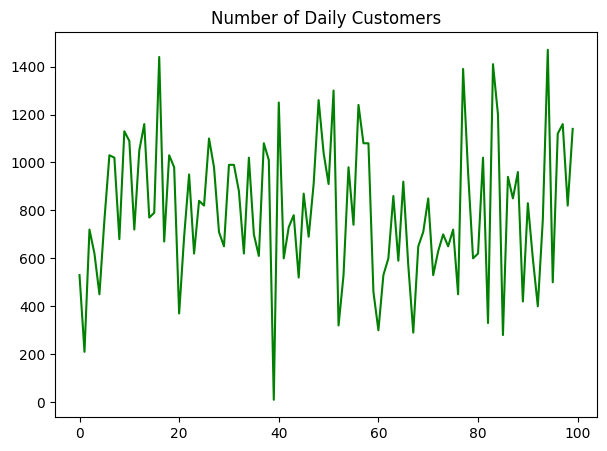

In [23]:
y1 = df["Daily_Customer_Count"].head(100)
x =  range(len(y1))
plt.figure(figsize=(7,5))
plt.plot(x,y1,color="g")
plt.title("Number of Daily Customers")

<ipython-input-24-fcd3c2796aa2>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df.Store_Area,color="red")


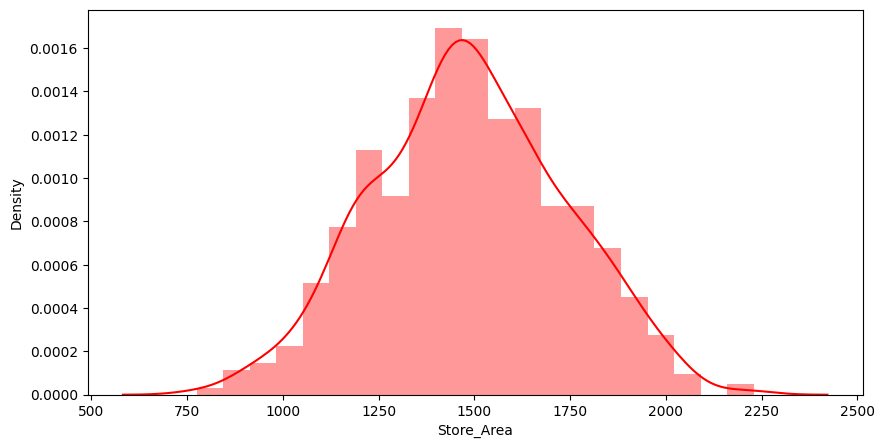

In [24]:
plt.figure(figsize=(10,5))
sns.distplot(df.Store_Area,color="red")
plt.show()

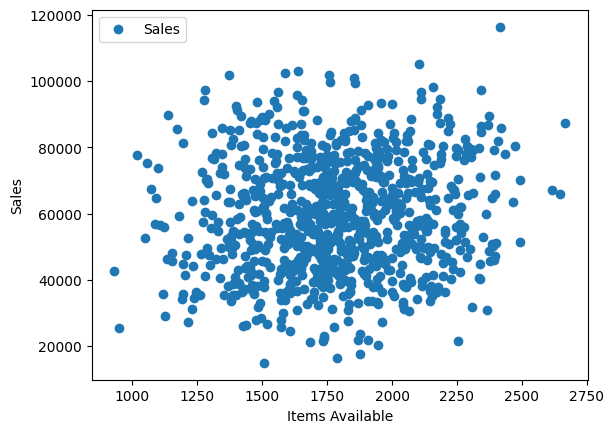

In [25]:
df.plot(x="Items_Available",y="Sales",style="o")
plt.xlabel("Items Available")
plt.ylabel("Sales")
plt.show()

In [26]:
# Correlation between store area and number of items available
correlate = df["Store_Area"].corr(df["Items_Available"])
correlate

0.9988907507528336

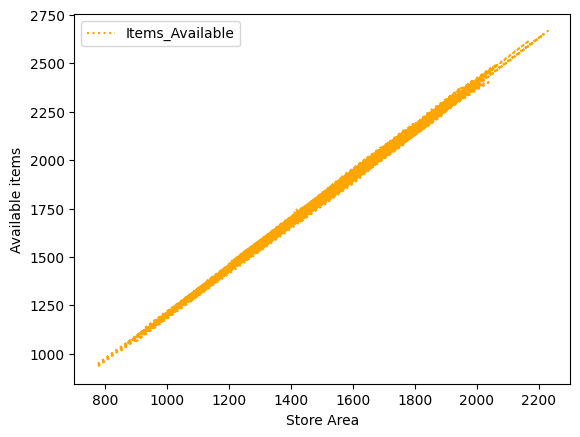

In [27]:
df.plot(x="Store_Area",y="Items_Available",style=":", color ="orange")
plt.xlabel("Store Area")
plt.ylabel("Available items")
plt.show()

#Simple Linear Regression

In [75]:
# Train and Test data
x=pd.DataFrame(df["Daily_Customer_Count"])
y=pd.DataFrame(df["Sales"])

In [76]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x, y, test_size=0.3, random_state=1) # 30% testing data and 70% training data

In [77]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(627, 1)
(269, 1)
(627, 1)
(269, 1)


In [78]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression()

In [79]:
reg.fit(x_train,y_train)

LinearRegression()

In [80]:
y_pred = reg.predict(x_test)

In [81]:
from sklearn import metrics

print('Mean Absolute Error :',metrics.mean_absolute_error(y_test,y_pred))
print("Mean Squared Error :",metrics.mean_squared_error(y_test,y_pred))
print("Root Mean Squared Error :",np.sqrt(metrics.mean_squared_error(y_test,y_pred)))

Mean Absolute Error : 14112.058986816171
Mean Squared Error : 289327905.11063576
Root Mean Squared Error : 17009.641533866485


# Multiple Linear Regression

In [49]:
a=pd.DataFrame(df.iloc[:,:-1]) # All columns except last column ---> Multiple Independent Variables
b=pd.DataFrame(df.iloc[:,-1]) # Last column

In [50]:
from sklearn.model_selection import train_test_split
a_train,a_test,b_train,b_test = train_test_split(a, b, test_size=0.3, random_state=1)

In [51]:
print(a_train.shape)
print(a_test.shape)
print(b_train.shape)
print(b_test.shape)

(627, 3)
(269, 3)
(627, 1)
(269, 1)


In [52]:
from sklearn.linear_model import LinearRegression
reg1 = LinearRegression()

In [53]:
reg1.fit(a_train,b_train)

LinearRegression()

In [54]:
b_pred = reg1.predict(a_test)

In [55]:
from sklearn import metrics

print('Mean Absolute Error :',metrics.mean_absolute_error(b_test,b_pred))
print("Mean Squared Error :",metrics.mean_squared_error(b_test,b_pred))
print("Root Mean Squared Error :",np.sqrt(metrics.mean_squared_error(b_test,b_pred)))

#Lower the RMS value value ---> better the model

Mean Absolute Error : 14058.132503536748
Mean Squared Error : 288883922.4247229
Root Mean Squared Error : 16996.585610784387


As the second model has lower RMS, we can conclude that it is better than the first model